# Hierarchical Clustering Part 1 - Single Linkage
This notebook shows simple examples of hierarchical clustering and the elbow/knee analysis used to select the most adequate number of clusters.

The notebook is an adaptation of 

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

We start by importing the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Example Data
We generate some example data with three blobs. 

In [3]:
random_state = 1234 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

X, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

Let's plot the blobs!

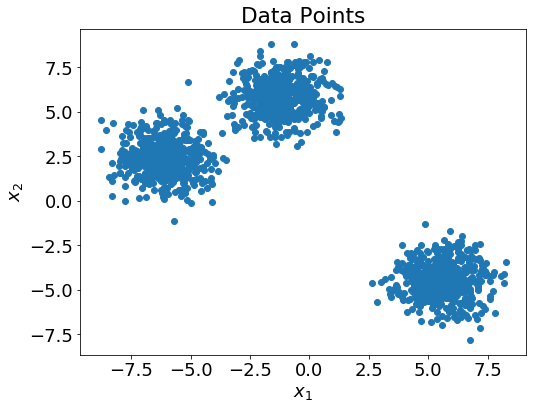

In [4]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(X[:,0], X[:,1], cmap=plt.get_cmap('Pastel1'));
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Data Points");

First, we generate the dendrogram using single linkage. The matrix z contains one raw for every merge operation.

In [5]:
Z = linkage(X, 'single')
print('Z has %d rows'%(len(Z)))

Z has 1499 rows


In [6]:
Z[:10]

array([[1247.     , 1466.     ,    0.001  ,    2.     ],
       [ 275.     , 1327.     ,    0.00315,    2.     ],
       [  76.     ,  151.     ,    0.00409,    2.     ],
       [ 159.     , 1174.     ,    0.00531,    2.     ],
       [ 900.     , 1225.     ,    0.00583,    2.     ],
       [1088.     , 1132.     ,    0.00588,    2.     ],
       [ 483.     , 1349.     ,    0.00781,    2.     ],
       [1018.     , 1262.     ,    0.00853,    2.     ],
       [ 268.     ,  579.     ,    0.00878,    2.     ],
       [ 470.     , 1085.     ,    0.00889,    2.     ]])

In [7]:
print('The first merge was done between %d and %d based on a distance of %.5f '%(Z[0][0],Z[0][1],Z[0][2]))

The first merge was done between 1247 and 1466 based on a distance of 0.00100 


Now let's plot the full dendrogram.

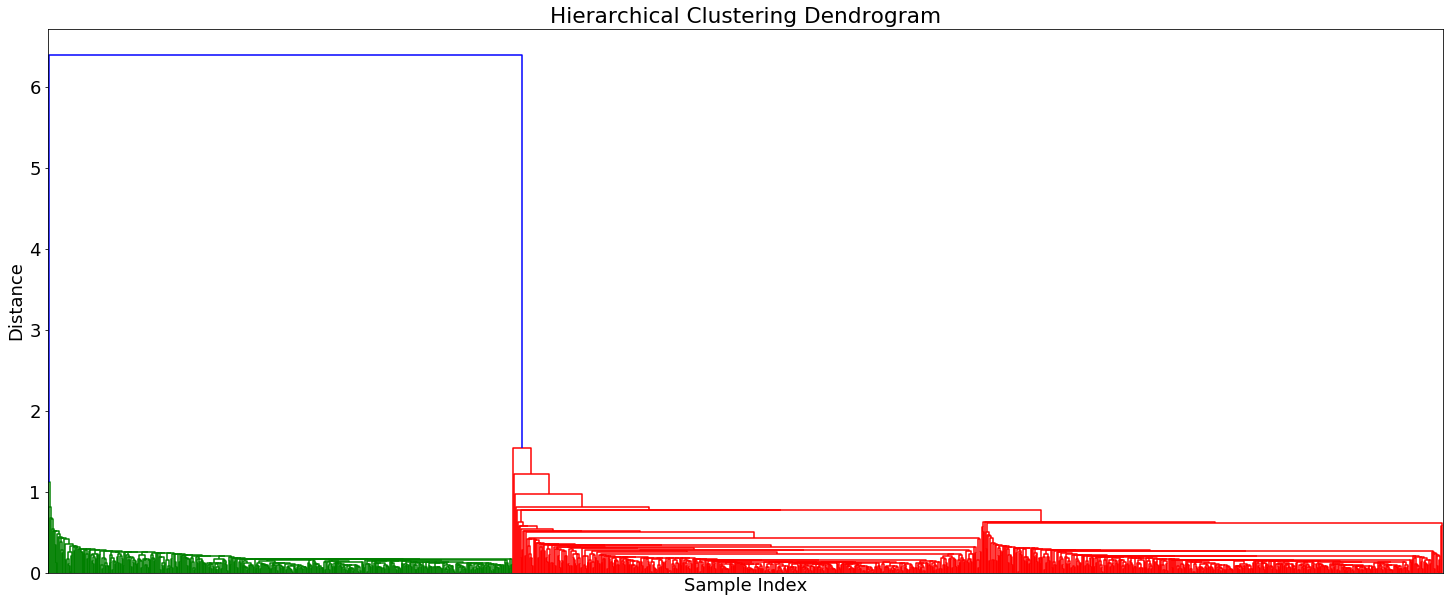

In [8]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.xticks([])
plt.show()

## Number of Cluster Selection using "Inconsistency"
The colors identify the clusters that have been automatically selected by SciPy using "inconsistency that works by identifying the number of clusters by comparing the current height of the merge with the average height of the previous merges, normalized by their standard deviation. 

$inconsistency= \frac{h-avg}{std}$

where $h$ is the current height, $avg$ is the average merge height over a window of previous merges (identified by a parameter $d$ or depth), and $std$ is the standard deviation of the previous merge heights over a window of size $d$. Links that join distinct clusters have a high inconsistency coefficient; links that join indistinct clusters have a low inconsistency coefficient.

As an example we can print the inconsistency of the final merges based on a window size of 5:

In [9]:
inconsistency = inconsistent(Z, d=5)

for i in reversed(range(1,15)):
    print("from %d to %d => Inconsistency %.3f"%(i,i+1,inconsistency[-i][3]))

from 14 to 15 => Inconsistency 0.752
from 13 to 14 => Inconsistency 1.026
from 12 to 13 => Inconsistency 0.886
from 11 to 12 => Inconsistency 1.755
from 10 to 11 => Inconsistency 1.204
from 9 to 10 => Inconsistency 2.500
from 8 to 9 => Inconsistency 1.690
from 7 to 8 => Inconsistency 1.427
from 6 to 7 => Inconsistency 1.464
from 5 to 6 => Inconsistency 1.627
from 4 to 5 => Inconsistency 1.615
from 3 to 4 => Inconsistency 1.599
from 2 to 3 => Inconsistency 1.501
from 1 to 2 => Inconsistency 2.635


As can be noted we have a higher inconsistendy between k=1 and k=2 but also for the merge between k=9 and k=10. This might suggest k=2 as a possible partition (as suggested in the dendrogram). However, inconsistency values depend on the size of the window (the depth used). So if we print the inconsistency using a higher depth value, the values change. Still the higher inconsistency coefficient is higher for the merge between 2 and 1, but its values for the previous merges are higher than the one for the 9 to 10 clusters merge.

In [10]:
inconsistency = inconsistent(Z, d=10)

for i in reversed(range(1,15)):
    print("from %d to %d => Inconsistency %.3f"%(i,i+1,inconsistency[-i][3]))

from 14 to 15 => Inconsistency 1.393
from 13 to 14 => Inconsistency 1.479
from 12 to 13 => Inconsistency 1.210
from 11 to 12 => Inconsistency 1.697
from 10 to 11 => Inconsistency 1.423
from 9 to 10 => Inconsistency 2.022
from 8 to 9 => Inconsistency 1.734
from 7 to 8 => Inconsistency 1.751
from 6 to 7 => Inconsistency 1.832
from 5 to 6 => Inconsistency 2.318
from 4 to 5 => Inconsistency 2.259
from 3 to 4 => Inconsistency 2.679
from 2 to 3 => Inconsistency 2.910
from 1 to 2 => Inconsistency 4.675


## Analyzing the Final Merges
To select the value of k we focus on the final part of the dendrogram which confirm that the last merges involve clusters of single values.

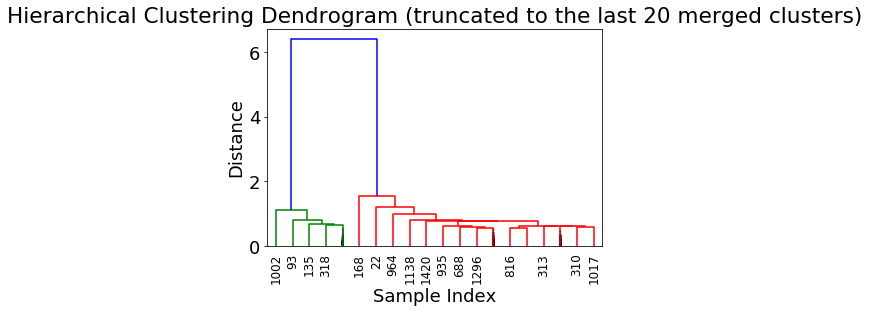

In [11]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 20 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Knee/Elbow Analysis
To decide the number of cluster, let's plot the WSS and BSS curves and perform a knee/elbow analysis. For every k, we compute the clustering from the dendrogram z and compute WSS and BSS.

In [1]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(Z, k, criterion='maxclust')
    centroids = [np.mean(X[clustering==c],axis=0) for c in range(1,k+1)]
    D = cdist(X, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/len(X)

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(X)**2)/len(X)
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

NameError: name 'fcluster' is not defined

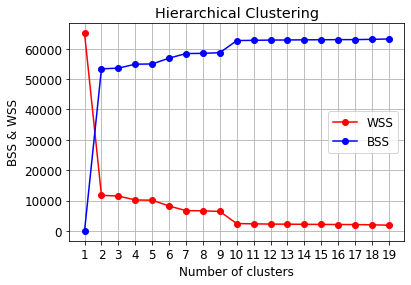

In [13]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'o-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'o-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

From the chart we note that there is a big drop for k=2 and then WSS and BSS smoothly decrease/increase until k=10. So we might decide to either choose k=2 or k=10.

## Visualization of Clustering Solutions

To better understand what happened, let's check the clusterings for all the values of k from 2 to 10.

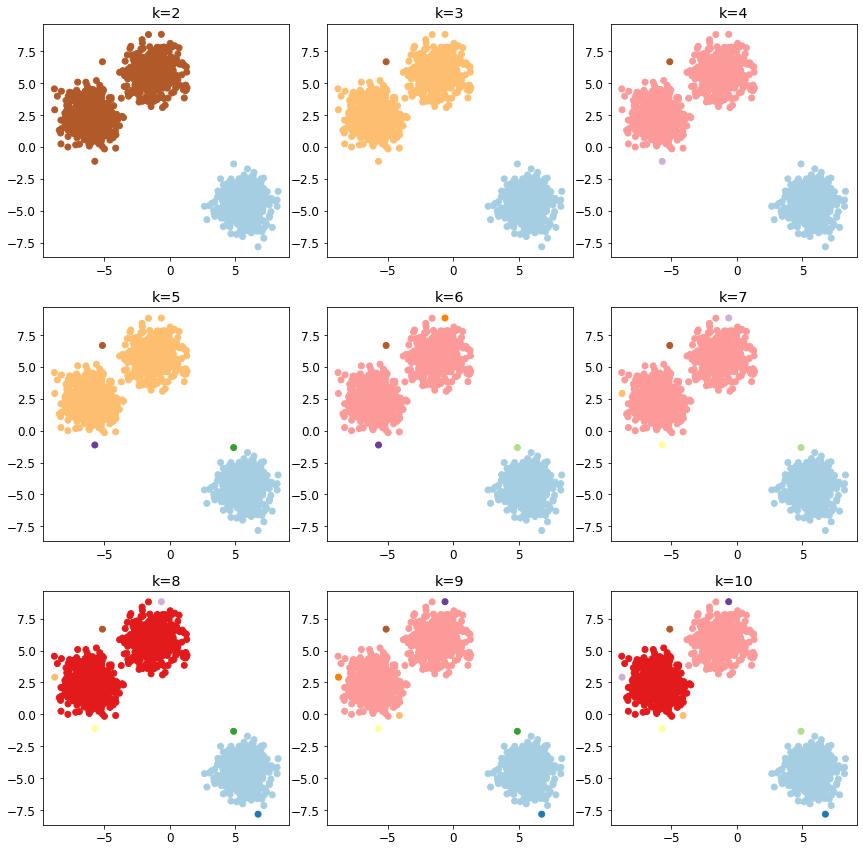

In [14]:
plt.figure(figsize=(12, 12));

for k in range(2,11):
    yp = fcluster(Z, k, criterion='maxclust')

    plt.subplot(330+(k-1))
    plt.title('k='+str(k))
    plt.scatter(X[:, 0], X[:, 1], c=yp,cmap=plt.get_cmap('Paired'))
    
plt.tight_layout()

Note that, when k=2 the algorithm has separated the two nearby cluster from the very distant one. The next merge operations regard points around the main clusters that are typically nearby existing clusters and thus don't generate significant changes of BSS and WSS until k=10 when the three big clusters and a pletora of one point clusters are found. 

To identify this we can analyze the size of the clusters produced for every value of k. As can be noted between 2 and 9 all the clusters that are generated contains one single item. For k=10, the largest cluster splits and afterwards the merges continue to involve clusters of very few elements.

In [15]:
for k in range(2,11):
    print ("Clustering using k="+str(k))
    clustering = fcluster(Z, k, criterion='maxclust')
    frequency = np.bincount(clustering)
    index = np.nonzero(frequency)[0]
    for i in zip(index,frequency[index]):
        print("\t"+str(i))
    print("-"*22)

Clustering using k=2
	(1, 500)
	(2, 1000)
----------------------
Clustering using k=3
	(1, 500)
	(2, 999)
	(3, 1)
----------------------
Clustering using k=4
	(1, 500)
	(2, 998)
	(3, 1)
	(4, 1)
----------------------
Clustering using k=5
	(1, 499)
	(2, 1)
	(3, 998)
	(4, 1)
	(5, 1)
----------------------
Clustering using k=6
	(1, 499)
	(2, 1)
	(3, 997)
	(4, 1)
	(5, 1)
	(6, 1)
----------------------
Clustering using k=7
	(1, 499)
	(2, 1)
	(3, 996)
	(4, 1)
	(5, 1)
	(6, 1)
	(7, 1)
----------------------
Clustering using k=8
	(1, 498)
	(2, 1)
	(3, 1)
	(4, 996)
	(5, 1)
	(6, 1)
	(7, 1)
	(8, 1)
----------------------
Clustering using k=9
	(1, 498)
	(2, 1)
	(3, 1)
	(4, 995)
	(5, 1)
	(6, 1)
	(7, 1)
	(8, 1)
	(9, 1)
----------------------
Clustering using k=10
	(1, 498)
	(2, 1)
	(3, 1)
	(4, 499)
	(5, 496)
	(6, 1)
	(7, 1)
	(8, 1)
	(9, 1)
	(10, 1)
----------------------


## Acceleration
The elbow methods can be applied also with other metrics. For instance, we can use it to search for the highest acceleration of merge distance growth. In the example below, we compute such difference from the dendrogam and plot it again the distance of each merge. Then, we look for the largest value and use it to select the number of clusters. 

In [16]:
merge_distance = Z[-20:, 2]
reverse_merge_distance = merge_distance[::-1]
index = np.arange(1,len(merge_distance)+1)

acceleration = np.diff(merge_distance, 2)  # 2nd derivative of the distances
reversed_acceleration = acceleration[::-1]

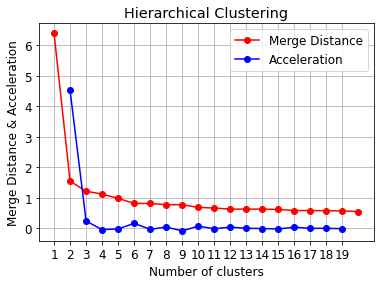

In [18]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(index, reverse_merge_distance, 'o-', color='red', label='Merge Distance')
plt.plot(index[:-2]+1, reversed_acceleration, 'o-', color='blue', label='Acceleration')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Merge Distance & Acceleration')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

In [19]:
print("The number of cluster suggested using acceleration is %d"%(reversed_acceleration.argmax() + 2))

The number of cluster suggested using acceleration is 2
